In [46]:
# eliminar colunas com pouca correlacao
# engenhocar outras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [170]:
df = pd.read_csv("data/02-zscore15.csv")
df.head(5)

,week_number,sales_depot_id,sales_channel_id,route_id,client_id,product_id,town,state,client_name,short_name,brand,weight,pieces,target
0,6,1310,1,2005,32695,43066,2260 GONZALEZ GALLO,JALISCO,MARIA GRACIELA ROCHA GUTIERREZ,Pay Pina,MLA,85.0,1.0,0.0
1,3,2029,1,1126,1048394,1309,2161 IRAPUATO GUADALUPE,GUANAJUATO,ARACELI ESTRADA PALATO,Bimbunuelos,BIM,66.0,4.0,0.0
2,4,2022,1,1221,2036290,1278,2152 ALTAMIRANO_BM,GUERRERO,EULOGIA,Nito,BIM,62.0,1.0,1.0
3,4,4041,1,1054,153108,5707,2368 TAMPICO BIMBO,TAMAULIPAS,ENCINO 2,Tostada Ondulada Tubo,MR,360.0,30.0,0.0
4,6,1116,1,1058,115369,1146,2011 AG. SAN ANTONIO,"MÉXICO, D.F.",LAS FLORES,Pan Integral,BIM,675.0,unknown,0.0


# feature selection and preparation

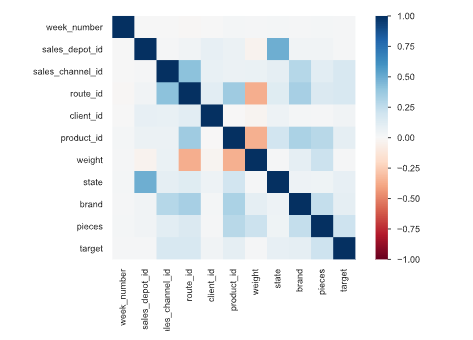

 - ## week_number

low correlation to target. remove

In [171]:
dfe = df.drop(columns=['week_number'])

 - ## sales_depot_id

low correlation to target. remove

In [172]:
dfe = dfe.drop(columns=['sales_depot_id'])

 - ## sales_channel_id

some correlation to target. we investigate

In [173]:
dfe['sales_channel_id'].describe()

count    936664.000000
mean          1.355749
std           1.419792
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          11.000000
Name: sales_channel_id, dtype: float64

In [174]:
dfe.groupby('sales_channel_id').size()/dfe['sales_channel_id'].count()

sales_channel_id
1     0.919323
2     0.004851
4     0.050102
5     0.000294
6     0.003791
7     0.008495
8     0.000648
11    0.012495
dtype: float64

we keep

In [175]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
dfe['sales_channel_id'] = pd.DataFrame(scaler.fit_transform(dfe[['sales_channel_id']]), columns=dfe[['sales_channel_id']].columns)

dfe

,sales_channel_id,route_id,client_id,product_id,town,state,client_name,short_name,brand,weight,pieces,target
0,0.0,2005,32695,43066,2260 GONZALEZ GALLO,JALISCO,MARIA GRACIELA ROCHA GUTIERREZ,Pay Pina,MLA,85.0,1.0,0.0
1,0.0,1126,1048394,1309,2161 IRAPUATO GUADALUPE,GUANAJUATO,ARACELI ESTRADA PALATO,Bimbunuelos,BIM,66.0,4.0,0.0
2,0.0,1221,2036290,1278,2152 ALTAMIRANO_BM,GUERRERO,EULOGIA,Nito,BIM,62.0,1.0,1.0
3,0.0,1054,153108,5707,2368 TAMPICO BIMBO,TAMAULIPAS,ENCINO 2,Tostada Ondulada Tubo,MR,360.0,30.0,0.0
4,0.0,1058,115369,1146,2011 AG. SAN ANTONIO,"MÉXICO, D.F.",LAS FLORES,Pan Integral,BIM,675.0,unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
936659,0.3,4906,1436346,34054,2468 MATAMOROS BIMBO,TAMAULIPAS,OXXO EXPRESS LUCIO BLANCO,Nito,BIM,62.0,1.0,1.0
936660,0.0,1202,4448718,1125,2016 AG. SAN LORENZO,"MÉXICO, D.F.",NO IDENTIFICADO,Tortillinas,TR,255.0,10.0,0.0
936661,0.0,1212,623879,1240,2353 HUAJUAPAN,OAXACA,SAN LUPITAS,Mantecadas Vainilla,BIM,125.0,4.0,0.0
936662,0.0,1001,2414065,48077,2094 CHALCO_BM,ESTADO DE MÉXICO,ACOALY SA DE CV,Totopo Chilaquiles,MR,280.0,unknown,0.0


 - ## route_id

some correlation. 2103 examples with frequency lower than 1% for all of them. to maintain importance of all of them, we use min-max:
- https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475

In [176]:
dfe['route_id'].describe()

count    936664.000000
mean       2107.157105
std        1478.590741
min           1.000000
25%        1161.000000
50%        1281.000000
75%        2802.000000
max        9835.000000
Name: route_id, dtype: float64

In [177]:
dfe.groupby('route_id').size()/dfe['route_id'].max()

route_id
1       0.000712
2       0.000610
3       0.000508
4       0.000305
5       0.000305
          ...   
9589    0.000102
9712    0.000102
9829    0.000102
9831    0.000102
9835    0.000102
Length: 2103, dtype: float64

In [178]:
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
dfe['route_id'] = pd.DataFrame(scaler.fit_transform(dfe[['route_id']]), columns=dfe[['route_id']].columns)

dfe

,sales_channel_id,route_id,client_id,product_id,town,state,client_name,short_name,brand,weight,pieces,target
0,0.0,0.203783,32695,43066,2260 GONZALEZ GALLO,JALISCO,MARIA GRACIELA ROCHA GUTIERREZ,Pay Pina,MLA,85.0,1.0,0.0
1,0.0,0.114399,1048394,1309,2161 IRAPUATO GUADALUPE,GUANAJUATO,ARACELI ESTRADA PALATO,Bimbunuelos,BIM,66.0,4.0,0.0
2,0.0,0.124059,2036290,1278,2152 ALTAMIRANO_BM,GUERRERO,EULOGIA,Nito,BIM,62.0,1.0,1.0
3,0.0,0.107077,153108,5707,2368 TAMPICO BIMBO,TAMAULIPAS,ENCINO 2,Tostada Ondulada Tubo,MR,360.0,30.0,0.0
4,0.0,0.107484,115369,1146,2011 AG. SAN ANTONIO,"MÉXICO, D.F.",LAS FLORES,Pan Integral,BIM,675.0,unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
936659,0.3,0.498780,1436346,34054,2468 MATAMOROS BIMBO,TAMAULIPAS,OXXO EXPRESS LUCIO BLANCO,Nito,BIM,62.0,1.0,1.0
936660,0.0,0.122127,4448718,1125,2016 AG. SAN LORENZO,"MÉXICO, D.F.",NO IDENTIFICADO,Tortillinas,TR,255.0,10.0,0.0
936661,0.0,0.123144,623879,1240,2353 HUAJUAPAN,OAXACA,SAN LUPITAS,Mantecadas Vainilla,BIM,125.0,4.0,0.0
936662,0.0,0.101688,2414065,48077,2094 CHALCO_BM,ESTADO DE MÉXICO,ACOALY SA DE CV,Totopo Chilaquiles,MR,280.0,unknown,0.0


- ## client_id

no correlation, we delete

In [179]:
dfe = dfe.drop(columns=['client_id'])

- ## product_id

some correlation. min-max again

In [180]:
dfe['product_id'].describe()

count    936664.000000
mean      20634.228583
std       18650.665556
min          41.000000
25%        1242.000000
50%       30532.000000
75%       37361.000000
max       49994.000000
Name: product_id, dtype: float64

In [181]:
dfe.groupby('product_id').size()/dfe['product_id'].count()

product_id
41       0.000001
53       0.000001
72       0.002110
73       0.003086
106      0.000045
           ...   
49986    0.000043
49988    0.000019
49990    0.000005
49992    0.000001
49994    0.000017
Length: 1180, dtype: float64

In [182]:
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
dfe['product_id'] = pd.DataFrame(scaler.fit_transform(dfe[['product_id']]), columns=dfe[['product_id']].columns)

dfe

,sales_channel_id,route_id,product_id,town,state,client_name,short_name,brand,weight,pieces,target
0,0.0,0.203783,0.861310,2260 GONZALEZ GALLO,JALISCO,MARIA GRACIELA ROCHA GUTIERREZ,Pay Pina,MLA,85.0,1.0,0.0
1,0.0,0.114399,0.025384,2161 IRAPUATO GUADALUPE,GUANAJUATO,ARACELI ESTRADA PALATO,Bimbunuelos,BIM,66.0,4.0,0.0
2,0.0,0.124059,0.024763,2152 ALTAMIRANO_BM,GUERRERO,EULOGIA,Nito,BIM,62.0,1.0,1.0
3,0.0,0.107077,0.113427,2368 TAMPICO BIMBO,TAMAULIPAS,ENCINO 2,Tostada Ondulada Tubo,MR,360.0,30.0,0.0
4,0.0,0.107484,0.022121,2011 AG. SAN ANTONIO,"MÉXICO, D.F.",LAS FLORES,Pan Integral,BIM,675.0,unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...
936659,0.3,0.498780,0.680900,2468 MATAMOROS BIMBO,TAMAULIPAS,OXXO EXPRESS LUCIO BLANCO,Nito,BIM,62.0,1.0,1.0
936660,0.0,0.122127,0.021700,2016 AG. SAN LORENZO,"MÉXICO, D.F.",NO IDENTIFICADO,Tortillinas,TR,255.0,10.0,0.0
936661,0.0,0.123144,0.024003,2353 HUAJUAPAN,OAXACA,SAN LUPITAS,Mantecadas Vainilla,BIM,125.0,4.0,0.0
936662,0.0,0.101688,0.961624,2094 CHALCO_BM,ESTADO DE MÉXICO,ACOALY SA DE CV,Totopo Chilaquiles,MR,280.0,unknown,0.0


- ## town

to test importance, we'll create a table with and another without this variable. so we'll look at it at the end

- ## state

moderately small number of unique values mean we can use one hot encoding here
- https://pbpython.com/categorical-encoding.html

In [183]:
dfe['state'].describe()

count               936664
unique                  33
top       ESTADO DE MÉXICO
freq                137997
Name: state, dtype: object

In [184]:
dfe.groupby('state').size()/dfe['state'].count()

state
AGUASCALIENTES           0.016819
BAJA CALIFORNIA NORTE    0.022860
BAJA CALIFORNIA SUR      0.006317
CAMPECHE                 0.006888
CHIAPAS                  0.014290
CHIHUAHUA                0.024592
COAHUILA                 0.023212
COLIMA                   0.008813
DURANGO                  0.013085
ESTADO DE MÉXICO         0.147328
GUANAJUATO               0.053384
GUERRERO                 0.021542
HIDALGO                  0.031177
JALISCO                  0.087293
MICHOACÁN                0.045573
MORELOS                  0.019131
MÉXICO, D.F.             0.103711
NAYARIT                  0.011032
NUEVO LEÓN               0.047773
OAXACA                   0.022373
PUEBLA                   0.059240
QUERETARO                0.004323
QUINTANA ROO             0.008515
Queretaro de Arteaga     0.006425
SAN LUIS POTOSÍ          0.018357
SINALOA                  0.019502
SONORA                   0.021372
TABASCO                  0.017381
TAMAULIPAS               0.029487
TLAXCALA

In [185]:
# one hot encoding
dfe = pd.get_dummies(dfe, columns=["state"])
dfe.head()

,sales_channel_id,route_id,product_id,town,client_name,short_name,brand,weight,pieces,target,...,state_Queretaro de Arteaga,state_SAN LUIS POTOSÍ,state_SINALOA,state_SONORA,state_TABASCO,state_TAMAULIPAS,state_TLAXCALA,state_VERACRUZ,state_YUCATÁN,state_ZACATECAS
0,0.0,0.203783,0.861310,2260 GONZALEZ GALLO,MARIA GRACIELA ROCHA GUTIERREZ,Pay Pina,MLA,85.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.114399,0.025384,2161 IRAPUATO GUADALUPE,ARACELI ESTRADA PALATO,Bimbunuelos,BIM,66.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.124059,0.024763,2152 ALTAMIRANO_BM,EULOGIA,Nito,BIM,62.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.107077,0.113427,2368 TAMPICO BIMBO,ENCINO 2,Tostada Ondulada Tubo,MR,360.0,30.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,0.107484,0.022121,2011 AG. SAN ANTONIO,LAS FLORES,Pan Integral,BIM,675.0,unknown,0.0,...,0,0,0,0,0,0,0,0,0,0


- ## client_name

no correlation, we delete

In [189]:
dfe['client_name'].describe()

count              936664
unique             173105
top       NO IDENTIFICADO
freq               167058
Name: client_name, dtype: object

In [190]:
dfe.groupby('client_name').size()/dfe['client_name'].count()

client_name
007                       0.000001
056 THE AIRPORT MARKET    0.000002
1 2 3                     0.000005
1 DE ABRIL                0.000001
1 DE DICIEMBRE            0.000004
                            ...   
yepas jardines            0.000003
yepas tierra blanca       0.000003
ÑEKA                      0.000001
ÑONTHE                    0.000001
ÑOÑO                      0.000003
Length: 173105, dtype: float64

In [187]:
dfe = dfe.drop(columns=['client_name'])

- ## short_name

IDF

In [191]:
dfe['short_name'].describe()

count            936640
unique              487
top       Pan Integral 
freq              36245
Name: short_name, dtype: object

In [192]:
dfe.groupby('short_name').size()/dfe['short_name'].count()

short_name
ActiFresh Menta          0.000001
ActiFresh Yerbabuena     0.000002
Agua Ciel Jamaica        0.000015
Agua Ciel Limon          0.000010
Agua Ciel Natural        0.000006
                           ...   
Tuinky Chocolate         0.001764
Tuinky Fresas Crema      0.001515
Tuinky Vainilla          0.001395
Twinkies Vainilla        0.000764
Wonder                   0.002702
Length: 487, dtype: float64

In [205]:
import cane
dataIDF = cane.idf(df)

  0%|          | 0/14 [00:00<?, ?it/s]

AttributeError: 'bool' object has no attribute 'to_numpy'

In [222]:
dfi = dfi.drop(columns=['short_name'])

- ## brand

moderately small number of unique values mean we can use one hot encoding here
- https://pbpython.com/categorical-encoding.html

In [206]:
dfe['brand'].describe()

count     936664
unique        25
top          BIM
freq      527265
Name: brand, dtype: object

In [207]:
dfe.groupby('brand').size()/dfe['brand'].count()

brand
BAR    0.000064
BIM    0.562918
BRE    0.000002
CC     0.000064
COR    0.000003
DH     0.016296
GBI    0.001233
JMX    0.000048
KOD    0.000124
LAR    0.024900
LON    0.001226
MLA    0.279324
MP     0.000002
MR     0.012868
ORO    0.000323
PUL    0.000012
RIC    0.000040
SAN    0.000485
SL     0.000388
SUA    0.003409
SUN    0.000091
THO    0.000005
TR     0.085660
TRI    0.000022
WON    0.010493
dtype: float64

In [208]:
dfe = pd.get_dummies(dfe, columns=["brand"])
dfe.head()

,sales_channel_id,route_id,product_id,town,short_name,weight,pieces,target,state_AGUASCALIENTES,state_BAJA CALIFORNIA NORTE,...,brand_PUL,brand_RIC,brand_SAN,brand_SL,brand_SUA,brand_SUN,brand_THO,brand_TR,brand_TRI,brand_WON
0,0.0,0.203783,0.861310,2260 GONZALEZ GALLO,Pay Pina,85.0,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.114399,0.025384,2161 IRAPUATO GUADALUPE,Bimbunuelos,66.0,4.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.124059,0.024763,2152 ALTAMIRANO_BM,Nito,62.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.107077,0.113427,2368 TAMPICO BIMBO,Tostada Ondulada Tubo,360.0,30.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.107484,0.022121,2011 AG. SAN ANTONIO,Pan Integral,675.0,unknown,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


 - ## weight

classes

In [209]:
# we can see that current distribution is all over the place
dfe.groupby('weight').size()/dfe['weight'].count()

weight
1.32        0.000002
5.00        0.000376
6.00        0.000002
12.00       0.000002
13.00       0.000130
              ...   
4020.00     0.000002
5000.00     0.000273
6000.00     0.000002
8040.00     0.000001
12000.00    0.000009
Length: 234, dtype: float64

In [210]:
# cuts data into 3 equally sized bins
dfe['weight'] = pd.qcut(dfe['weight'],q=3,labels=False)

In [211]:
dfe['weight']

0         0
1         0
2         0
3         2
4         2
         ..
936659    0
936660    2
936661    1
936662    2
936663    1
Name: weight, Length: 936664, dtype: int64

<AxesSubplot:ylabel='Frequency'>

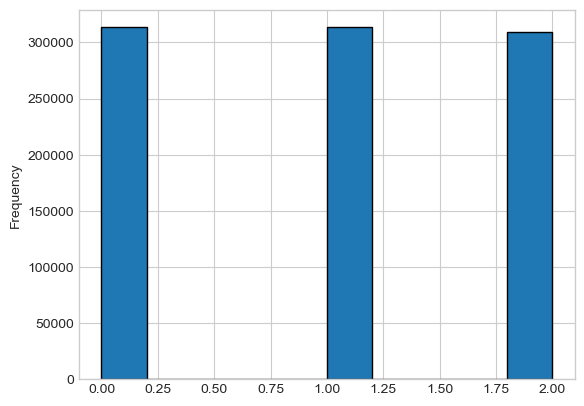

In [212]:
# distribution after cut
dfe['weight'].plot(kind='hist', edgecolor='black')

 - ## pieces

classes

In [213]:
dfe['pieces'].describe()

count      936664
unique         32
top       unknown
freq       332425
Name: pieces, dtype: object

In [214]:
# changing "unknown" to 0
dfe.loc[dfe["pieces"] == "unknown", "pieces"] = 0

In [215]:
dfe['pieces'] = pd.to_numeric(dfe['pieces'])

In [216]:
# current distribution
dfe.groupby('pieces').size()/dfe['pieces'].count()

pieces
0.0      0.354903
1.0      0.098017
2.0      0.151866
3.0      0.073377
4.0      0.085791
5.0      0.002216
6.0      0.078758
7.0      0.000038
8.0      0.054326
9.0      0.000002
10.0     0.060013
11.0     0.000115
12.0     0.002664
14.0     0.003176
15.0     0.004216
16.0     0.000302
18.0     0.004800
20.0     0.011855
21.0     0.000781
22.0     0.001486
24.0     0.000147
25.0     0.000001
27.0     0.000001
30.0     0.007285
32.0     0.000001
33.0     0.003477
36.0     0.000001
40.0     0.000249
43.0     0.000002
50.0     0.000096
104.0    0.000002
200.0    0.000033
dtype: float64

In [217]:
dfi = dfe.copy()

0-0: 35%\
1-4: 30-40%\
5-200: remaining

In [218]:
# technical limitations mean we have to set the limits by hand
bins = pd.IntervalIndex.from_tuples([(-1, 0.5), (0.6, 4.5), (4.6, 201)])
labels = ['0', '1', '2']
# dfi['pieces'] = pd.cut(dfi['pieces'], bins, labels=['0', '1', '2']) not working bc of bug lol

# fix by user anky at https://stackoverflow.com/questions/60846442/python-pandas-cut-labels-are-ignored
dfi['pieces']  = dfi['pieces'].map(dict(zip(bins,labels)))

<AxesSubplot:ylabel='Frequency'>

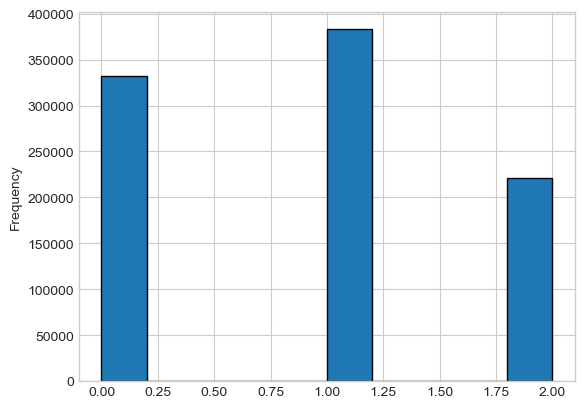

In [219]:
# distribution isn't perfect but usable
dfi['pieces'] = pd.to_numeric(dfi['pieces'])
dfi['pieces'].plot(kind='hist', edgecolor='black')

- ## town

In [223]:
dfi_townless = dfi.copy()
dfi_townless = dfi_townless.drop(columns=['town'])

In [225]:
dfi_townless.to_csv('data/03-sem-town-shortname.csv',index=False)

In [224]:
dfi_townless

,sales_channel_id,route_id,product_id,weight,pieces,target,state_AGUASCALIENTES,state_BAJA CALIFORNIA NORTE,state_BAJA CALIFORNIA SUR,state_CAMPECHE,...,brand_PUL,brand_RIC,brand_SAN,brand_SL,brand_SUA,brand_SUN,brand_THO,brand_TR,brand_TRI,brand_WON
0,0.0,0.203783,0.861310,0,1,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.114399,0.025384,0,1,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.124059,0.024763,0,1,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.107077,0.113427,2,2,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.107484,0.022121,2,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936659,0.3,0.498780,0.680900,0,1,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
936660,0.0,0.122127,0.021700,2,2,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
936661,0.0,0.123144,0.024003,1,1,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
936662,0.0,0.101688,0.961624,2,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
dfe['town'].describe()

count                   936664
unique                     256
top       2017 AG. SANTA CLARA
freq                     11649
Name: town, dtype: object

In [158]:
dfe.groupby('town').size()/dfe['town'].count()

town
2001 AG. ATIZAPAN                      0.010607
2002 AG. AZCAPOTZALCO                  0.006451
2003 AG. COACALCO                      0.007157
2004 AG. CUAUTITLAN                    0.005125
2007 AG. LA VILLA                      0.008816
                                         ...   
2575 TIJUANA ROSARITO                  0.002930
2576 GUERRERO NEGRO                    0.000443
2647 BLM_AG. CAMPESINOS AUTOSERVICI    0.000215
2655 LOS MOCHIS                        0.000023
3216 NUEVO LAREDO                      0.001324
Length: 256, dtype: float64